# XGBoost

## XGBoost 개요

- XGBoost : eXtra Gradient Boost

- 주요 장점
    - 뛰어난 예측 성능
    - GBM 대비 빠른 수행 시간
        - CPU 병렬 처리, GPU 지원
    - 다양한 성능 향상 기능
        - 규제(Regularization) 기능 탑재
        - Tree Pruning
    - 다양한 편의 기능
        - 조기 중단(Early Stopping)
        - 자체 내장된 교차 검증
        - 결손값 자체 처리

## XGBoost 파이썬 구현
- C/C++ Native Module --> 파이썬 Wrapper --> 사이킷런 Wrapper

- C/C++ Native Module
    - XGBoost는 최초 C/C++로 작성됨

- 파이썬 Wrapper
    - C/C++ 모듈을 호출하는 파이썬 Wrapper
    
- 사이킷런 Wrapper
    - 사이킷런 프레임과 통합될 수 있는 파이썬 Wrapper Class 지원
        - XGBClassifier
        - XGBRegressor
    - 학습과 예측을 다른 사이킷런 API와 동일하게 fit()과 predict()로 수행
    - GridSearchCV와 같은 다른 사이킷런 모듈과 같이 사용 가능

## XGBoost 파이썬 래퍼와 사이킷런 래퍼 API 비교

- 파이썬 Wrapper
    - 사용 모듈
        - from xgboost as xgb
    - 학습용과 테스트용 데이터 세트
        - DMatrix 객체를 별도 생성
        - train = xgb.DMatrix(data=X_train, label=y_train)
        - DMatrix 생성자로 피처 데이터 세트와 레이블 데이터 세트를 입력
    - 학습 API
        - Xgb_model = xgb.train()
        - Xgb_model은 학습된 객체를 반환 받음
    - 예측 API
        - xgb.train()으로 학습된 객체에서 predict() 호출. 즉 Xgb_model.predict()
        - 이때 반환 결과는 예측 결과가 아니라 예측 결과를 추정하는 확률값 반환
    - 피처 중요도 시각화
        - plot_importance() 함수 이용

- 사이킷런 Wrapper
    - 사용 모듈
        - from xgboost import XGBClassifier
    
    - 학습용과 테스트용 데이터 세트
        - 넘파이나 판다스를 이용
    
    - 학습 API
        - XGBClassifier.fit()
    
    - 예측 API
        - XGBClassifier.predict()
        - 예측 결과값 반환

    - 피처 중요도 시각화
        - plot_importance() 함수 이용

## XGBoost 파이썬 래퍼 와 사이킷런 래퍼 하이퍼 파라미터 비교
- 파이선 Wrapper vs. 사이킷런 Wrapper
    - eta vs. learning_rate
        - GBM의 학습률(learning rate)과 같은 파라미터. 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로
          수행할 때 업데이트 되는 학습률 값.
        - 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3. 사이킷런 래퍼 클래스를 이용할 경우 eta는
          learning_rate 파라미터로 대체되며 디폴트는 0.1 임
    
    - num_boost_rounds vs. n_estimators
        - 사이킷런 앙상블의 n_estimators와 동일. 약한 학습기의 개수(반복 수행 회수)

    -min_child_weight vs. min_child_weight
        - 결정트리의 min_chile_leaf와 유사. 과적합 조절용

    - max_depth vs. max_depth
        - 결정트리의 max_depth와 동일. 트리의 최대 길이

    - sub_sample vs. subsample
        - GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정.
        - sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용함.
        - 0에서 1 사이의 값이 가능하나 일반적으로 0.5 ~ 1 사이의 값을 사용함.

    - lambda vs. reg_lambda 
        - L2 규제(Regularization) 적용 값. 기본값은 1임. 값이 클수록 규제 값이 커짐. 과적함 제어
    
    - alpha vs. reg_alpha
        - L1 규제(Regularization) 적용 값. 기본값은 0임. 값이 클수록 규제 값이 커짐. 과적함 제어

    - colsample_bytree vs. colsample_bytree
        - GBM의 max_features와 유사
        - 트리생성에 필요한 피처(컬럼)를 임의의 샘플링 하는 데 사용됨.
        - 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용함.

    - scale_pos_weight vs. scale_pos_weight
        - 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터. 기본값은 1

    - gamma vs. gamma
        - 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값임.
        - 해당 값보다 큰 손실(lost)이 감소된 경우에 리프 노드를 분리함. 값이 클수록 과적합 감소 효과가 있음

- 사이킷런 Wrapper의 경우 GBM에 동일한 하이퍼 파라미터가 있다면 이를 사용하고 그렇지 않다면 파이썬 Wrapper의

  하이퍼 파라미터를 사용

## XGBoost 조기 중단 기능(Early Stopping)

- XGBoost는 특정 반복 횟수 만큼 더 이상 비용함수가 감소하지 않으면 지정된 반복횟수를 다 완료하지 않고 
  
  수행을 종료할 수 있음

- 학습을 위한 시간을 단축 시킬 수 있음. 특히 최적화 튜닝 단계에서 적절하게 사용 가능

- 너무 반복 횟수를 단출할 경우 예측 성능 최적화가 안된 상태에서 학습이 종료 될 수 있으므로 유의 필요

- 조기 중단 설정을 위한 주요 파라미터
    - early_stopping_rounds : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복 횟수
    - eval_metric : 반복 수행시 사용하는 비용 평가 지표
    - eval_set : 평가를 수행하는 별도의 검증 데이터 세트. 
                 일반적으로 검증 데이터 세트에서 반복적으로 비용 감소 성능 평가.

    - <img src="../images/early_stopping.png" width="400px" height="300px" title="Early Stopping"></img>


* XGBoost 버전 확인

In [ ]:
#conda install -c anaconda py-xgboost                          

In [11]:
import xgboost

print(xgboost.__version__)

1.5.0


### 파이썬 Native XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋

- 데이터명
    - 위스콘신 유방암 진단 데이터(Wisconsin Diagnostic Breast Cancer(WDBC))
- 컬럼 개수 
    - 32개(ID, 진단결과, 30개의 실측값)
- 데이터 설명
    - 위스콘신 대학교에서 제공한 유방암 진단결과 데이터
    - 머신러닝에서 knn 등의 예제로 자주 사용됨.
- 컬럼 설명 - 개략 설명
    - <img src="../datasets/wdbc.png" width="400px" height="1000px" title="Wisconsin Diagnostic Breast Cancer"></img>
    - Diagnostic : 1(악성), 0(양성) 

**데이터 세트 로딩 하기**

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# xgboost 패키지 로딩하기
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [2]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label이므로 Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 컬럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

print(X_train.shape , X_tr.shape, X_val.shape, X_test.shape)

(455, 30) (409, 30) (46, 30) (114, 30)


**학습과 예측 데이터 세트를 DMatrix로 변환**
* DMatrix는 넘파이 array, DataFrame에서도 변환 가능

In [ ]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환. 
# 학습, 검증, 테스트용 DMatrix를 생성. 
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

**하이퍼 파라미터 설정**

In [ ]:
params = { 'max_depth':3,
           'eta': 0.05,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

**주어진 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달하고 학습**

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

**predict()를 통해 예측 확률값을 반환하고 예측 값으로 변환**

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

In [ ]:
pred_probs.shape

**get_clf_eval( )을 통해 예측 평가**

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , preds, pred_probs)

**Feature Importance 시각화**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 Wrapper XGBoost 개요 및 적용 

**사이킷런 래퍼 클래스 임포트, 학습 및 예측**

In [3]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [6]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


**early stopping을 50으로 설정하고 재 학습/예측/평가**

In [7]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [8]:
get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9933


**early stopping을 10으로 설정하고 재 학습/예측/평가**

In [9]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

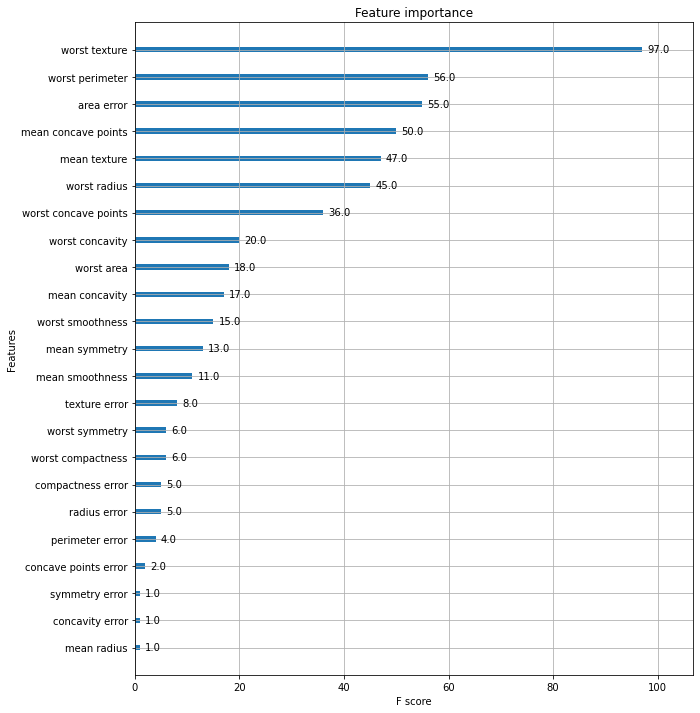

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)